> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [378]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [402]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

data = pd.read_csv('tmdb-movies.csv')

In [403]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(10866, 21)


In [404]:
data.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [418]:
########################################
###removing nan values from cast, keeping only movies, that has cast
####################################
data = data[data["cast"].isnull() == False]
data = data[data["genres"].isnull() == False]

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [419]:
#cleaning data - converting budget and revenue to a visually friendlier version dividing by 10^6
#so numbers in millions are being converted.

data["budgetDivided"] = data.budget.divide(10**6)
data["revenueDivided"] = data.revenue.divide(10**6)

#print(data["budgetDivided"].head(10))
#print(data["revenueDivided"].head(10))

In [420]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

###
#Creating a dict for the cast, and how many times each actor casted for movies
###
actor_dict = {}

actors = data["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                
            
                

sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
sorted_actor_dict[0:20]




[('Robert De Niro', 72),
 ('Samuel L. Jackson', 71),
 ('Bruce Willis', 62),
 ('Nicolas Cage', 61),
 ('Michael Caine', 53),
 ('Robin Williams', 51),
 ('John Cusack', 50),
 ('John Goodman', 49),
 ('Morgan Freeman', 49),
 ('Liam Neeson', 48),
 ('Susan Sarandon', 48),
 ('Alec Baldwin', 47),
 ('Julianne Moore', 47),
 ('Tom Hanks', 46),
 ('Johnny Depp', 46),
 ('Christopher Walken', 46),
 ('Gene Hackman', 46),
 ('Dennis Quaid', 45),
 ('Willem Dafoe', 45),
 ('Ed Harris', 44)]

In [423]:


year_set = set()
genre_set = set()
genres_and_year = data[["genres", "release_year"]]

#########################
#create a set of unique years of movies
#########################
production_year = genres_and_year["release_year"]
production_year = production_year.drop_duplicates()
for year in production_year:
    if year not in year_set:
        year_set.add(year)
        
#print(year_set)


#############################################################
#create a set of unique genres parsing all the years
#############################################################
for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_set:
                genre_set.add(genre)


#print("year:", year, "\n", sorted(genre_dict.items(), key = operator.itemgetter(1), reverse = True))      


##########################################################################
#create a dataframe which contains the sum of movies' genre per year
##########################################################################
gerne_count_per_year_df = pd.DataFrame(index = year_set, columns=genre_set)
gerne_count_per_year_df[:] = 0  

for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] = genre_dict[genre] + 1
                    
    aux_df = pd.DataFrame(genre_dict, index = [year])
    gerne_count_per_year_df.loc[year, aux_df.columns] = gerne_count_per_year_df.loc[year, aux_df.columns] + aux_df.loc[year]



########################################################
###most popular genre of movies from year to year
########################################################
#print(gerne_count_per_year_df.apply( max, axis=1 ))
#print(gerne_count_per_year_df.idxmax(axis = 1))
most_popular_genre_by_year = pd.DataFrame([gerne_count_per_year_df.idxmax(axis = 1).values,
                                          gerne_count_per_year_df.apply( max, axis=1 ).values],
                                          columns = gerne_count_per_year_df.index,
                                         index = ["genre", 'counts'])

print(most_popular_genre_by_year.T)




       genre counts
1960   Drama     13
1961   Drama     16
1962   Drama     21
1963  Comedy     13
1964   Drama     20
1965   Drama     20
1966  Comedy     16
1967  Comedy     17
1968   Drama     19
1969   Drama     13
1970   Drama     19
1971   Drama     30
1972   Drama     16
1973   Drama     31
1974   Drama     21
1975   Drama     17
1976   Drama     22
1977   Drama     23
1978   Drama     29
1979   Drama     30
1980   Drama     32
1981   Drama     32
1982   Drama     33
1983   Drama     35
1984   Drama     40
1985  Comedy     51
1986   Drama     51
1987  Comedy     57
1988  Comedy     69
1989  Comedy     63
1990   Drama     60
1991   Drama     63
1992   Drama     65
1993   Drama     90
1994  Comedy     88
1995   Drama     93
1996   Drama    104
1997   Drama     83
1998   Drama    108
1999   Drama    113
2000   Drama    100
2001  Comedy    101
2002   Drama    129
2003  Comedy    111
2004   Drama    141
2005   Drama    182
2006   Drama    196
2007   Drama    197
2008   Drama    233


Most popular genre by year: Documentary 2014
Most popular genre by year: History 2008
Most popular genre by year: Foreign 2008
Most popular genre by year: Western 1970
Most popular genre by year: Family 2011
Most popular genre by year: Animation 2010
Most popular genre by year: Adventure 2009
Most popular genre by year: TV Movie 2015
Most popular genre by year: Mystery 2009
Most popular genre by year: Action 2014
Most popular genre by year: Romance 2010
Most popular genre by year: Comedy 2009
Most popular genre by year: Music 2015
Most popular genre by year: Crime 2013
Most popular genre by year: War 2014
Most popular genre by year: Fantasy 2009
Most popular genre by year: Science Fiction 2015
Most popular genre by year: Thriller 2014
Most popular genre by year: Drama 2014
Most popular genre by year: Horror 2015


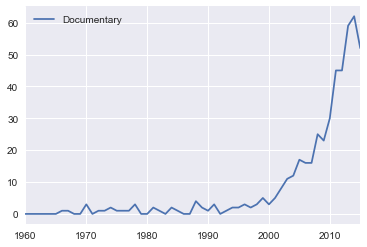

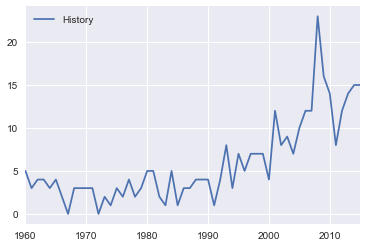

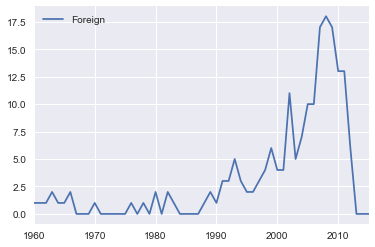

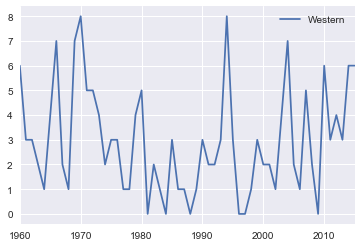

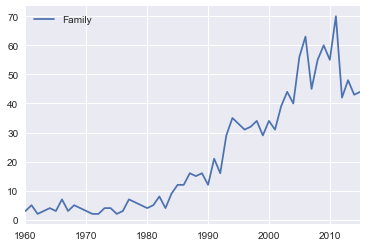

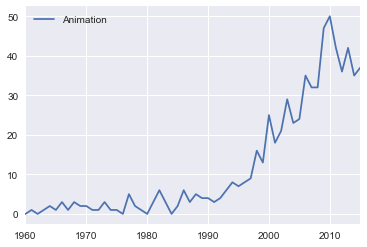

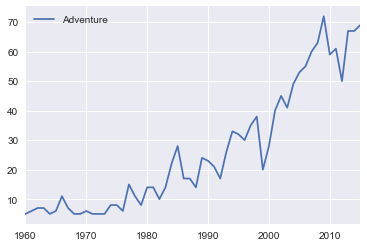

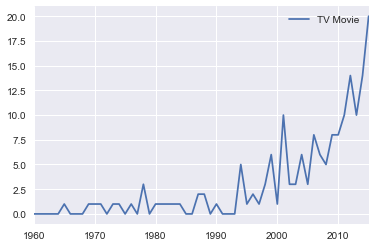

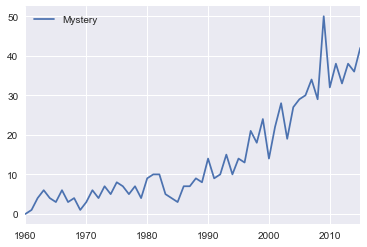

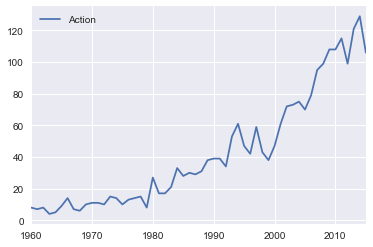

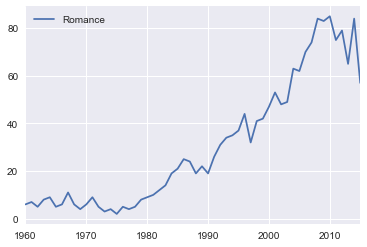

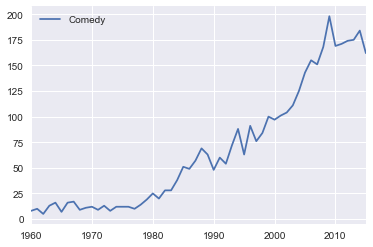

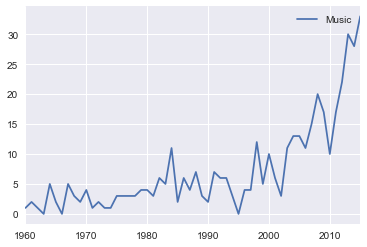

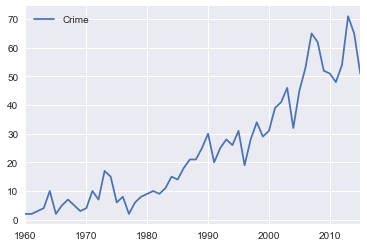

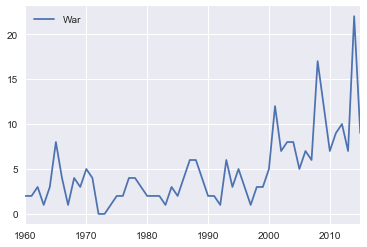

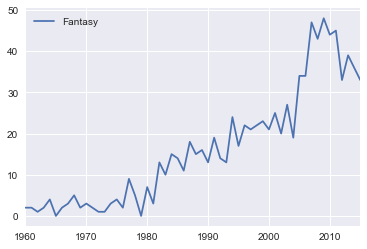

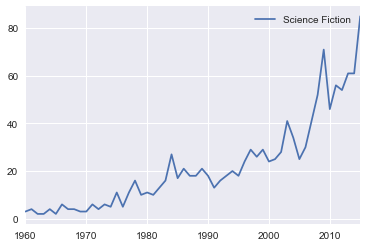

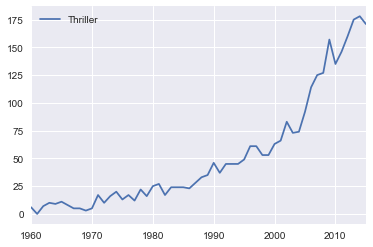

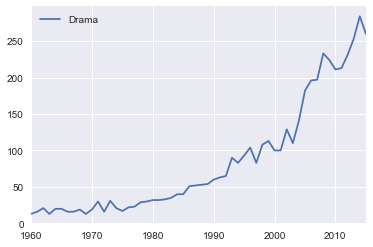

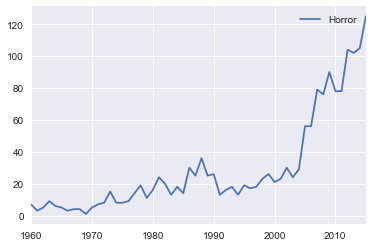

In [422]:
############################################
####printing genre trend over the years
############################################
%matplotlib inline
for ycolumn in gerne_count_per_year_df.columns:
    print("Most popular genre by year:", ycolumn, gerne_count_per_year_df[ycolumn].idxmax())
    
    
for ycolumn in gerne_count_per_year_df.columns:
    gerne_count_per_year_df.plot(y = ycolumn, kind='line')

#[ax.legend(loc=1) for ax in plt.gcf().axes]

In [385]:
###
#Creating seperate lists with budget and movies
###
revenue_dict = {}

#fetching different columns with 2 different ways of code
movies_and_revenue = data[["original_title", "revenueDivided"]]
movies_and_budget = data[['original_title','budgetDivided']]

#movies_and_budget.sort_values(by = "budgetDivided", ascending = False)
print(movies_and_revenue.sort_values(by="revenueDivided", ascending=False).head(10))
print(movies_and_budget.sort_values(by = "budgetDivided", ascending = False).head(10))

                                    original_title  revenueDivided
1386                                        Avatar     2781.505847
3                     Star Wars: The Force Awakens     2068.178225
5231                                       Titanic     1845.034188
4361                                  The Avengers     1519.557910
0                                   Jurassic World     1513.528810
4                                        Furious 7     1506.249360
14                         Avengers: Age of Ultron     1405.035767
3374  Harry Potter and the Deathly Hallows: Part 2     1327.817822
5422                                        Frozen     1274.219009
5425                                    Iron Man 3     1215.439994
                                   original_title  budgetDivided
2244                            The Warrior's Way          425.0
3375  Pirates of the Caribbean: On Stranger Tides          380.0
7387     Pirates of the Caribbean: At World's End          300.0
14 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

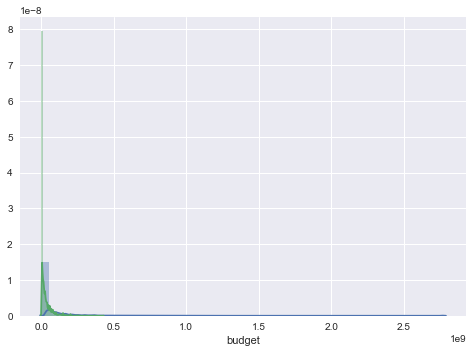

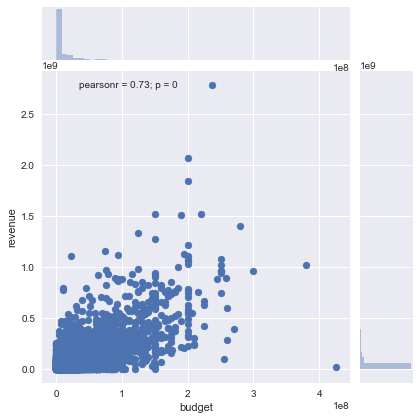

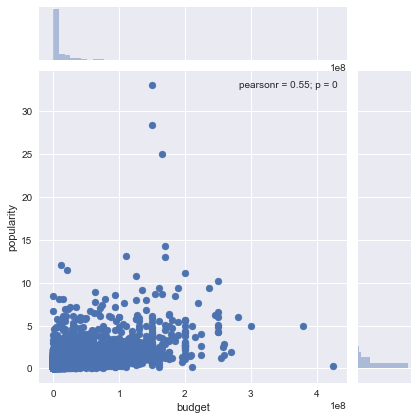

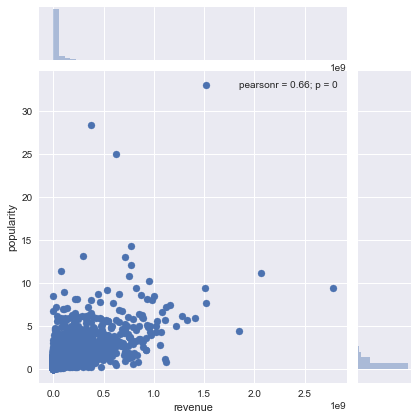

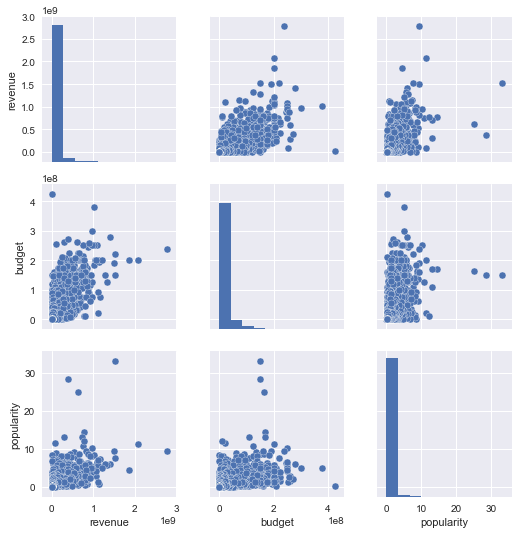

In [386]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#explore the revenue data

%matplotlib inline
#aux_series = pd.DataFrame(data.revenue.values, data.budget.values, columns=['a', 'b'])
aux_series = data[['revenue', 'budget', 'popularity']].copy()

sns.set(color_codes=True)
sns.distplot(data.revenue);
sns.distplot(data.budget);


sns.jointplot(x="budget", y="revenue", data=data)
sns.jointplot(x="budget", y="popularity", data=data)
sns.jointplot(x="revenue", y="popularity", data=data)


sns.pairplot(aux_series);

### Research Question 2  (Replace this header name!)

In [387]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [424]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0